# CSE 5522 Lab1 Part 2
# Name: Jian Gao

In [127]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split


In [128]:
people_URL = "https://raw.githubusercontent.com/efosler/cse5522data/master/height_vs_weight.csv"
people_df = pd.read_csv(people_URL)
people_dataset = np.array(people_df)
people_target = np.array(people_df[['basketball']])
column_name = np.array(people_df.columns.values)

In [129]:
# Split train and test datasets into 80/20
people_train, people_test, people_traintarget, people_testtarget = train_test_split(people_df,people_target, test_size = 0.2)

In [130]:
heights_train = np.array(people_train['height'], dtype='float').reshape(-1,1)
heights_test = np.array(people_test['height'], dtype = 'float').reshape(-1,1)

weight_train = np.array(people_train['weight'], dtype = 'float').reshape(-1,1)
weight_test = np.array(people_test['weight'], dtype = 'float').reshape(-1,1)

female_train = np.array(people_train['female']).reshape(-1,1)
female_test = np.array(people_test['female']).reshape(-1,1)

In [131]:
# Define method to compute accuracy
def compute_accuracy(predictions, targets):
    predictions_temp = []
    accuracy_count = 0.0 
    for x in range (len(predictions)):
        if predictions[x] > 0.5:
            predictions_temp.append(1.0)
        elif predictions[x] <= 0.5:
            predictions_temp.append(0.0)
    
    for y in range(len(predictions)):
        if predictions_temp[y] == targets[y]:
            accuracy_count +=1
            
    accuracy = accuracy_count / len(predictions)
    return accuracy
    

In [132]:
# Sigmoid function to predict features
def sigmoid_function(value):
    result = []
    for item in value:
        result.append(1/(1+math.exp(-item)))
    return result

In [133]:
# Get predictions depend on features' size
def get_prediction(weights, features):
    if features.shape[1] == 1:
        predictions = np.array([sigmoid_function(features * weights[0] + weights[1])])
    elif features.shape[1] == 2:
        predictions = np.array([sigmoid_function(features[:,0] * weights[0] + features[:,1] * weights[1] + weights[2])])
    elif features.shape[1] == 3:
        predictions = np.array([sigmoid_function(features[:,0] * weights[0] + features[:,1] * weights[1] + features[:,2] * weights[2] + weights[3])])
    predictions = np.transpose(predictions)
    return predictions

In [134]:
# Log loss function, return loss and accuracy
def loss_function(predictions, weights, features,  targets):
    accuracy = compute_accuracy(predictions, targets)
    length = len(targets)
    target_one_loss = targets*np.log(predictions)
    target_zero_loss = (1-targets)*np.log(1-predictions)
    loss = target_one_loss + target_zero_loss
    loss = -loss.sum() / length
    return [loss,accuracy]

In [135]:
# Compute gradient based on predictions and targets when only have one feature
def computeGradientForOneFeature(predictions, weights, features, targets):
    errors = predictions - targets
    sum_errors = errors.sum()
    gradient_w1 = np.dot(np.transpose(features), errors)
    gradient = np.array([gradient_w1.item(), sum_errors])
    gradient = gradient / len(features)
    return gradient                        

In [136]:
# Compute gradient based on predictions and targets when have two features
def computeGradientForTwoFeature(predictions, weights, features, targets):
    errors = predictions - targets
    sum_errors = errors.sum()
    gradient_w1 = np.dot(np.transpose(features[:,0]), errors)
    gradient_w2 = np.dot(np.transpose(features[:,1]), errors)
    gradient = np.array([gradient_w1[0],gradient_w2[0],sum_errors])
    gradient = gradient / len(features)
    return gradient                        

In [137]:
# Compute gradient based on predictions and targets when have three features
def computeGradientForThreeFeature(predictions, weights, features, targets):
    errors = predictions - targets
    sum_errors = errors.sum()
    gradient_w1 = np.dot(np.transpose(features[:,0]), errors)
    gradient_w2 = np.dot(np.transpose(features[:,1]), errors)
    gradient_w3 = np.dot(np.transpose(features[:,2]), errors)
    gradient = np.array([gradient_w1[0],gradient_w2[0],gradient_w3[0],sum_errors])
    gradient = gradient / len(features)
    return gradient                        

In [138]:
# Apply gradient descent on weights based on gradient
def computeGradientDescentWeightUpdate(predictions, weights, features, targets, learning_rate):
    if features.shape[1] == 1:
        gradient = computeGradientForOneFeature(predictions, weights, features, targets)
    elif features.shape[1] == 2:
        gradient = computeGradientForTwoFeature(predictions, weights, features, targets)
    elif features.shape[1] == 3:
        gradient = computeGradientForThreeFeature(predictions, weights, features, targets)
    weights = weights - learning_rate * gradient
    return weights

In [139]:
# Train the logistic regression model by applying gradient 10000 times, return updated weights and predictions
def trainModel(weights, features, targets):
    loss_for_features = []
    accuracy_for_features = []
    learning_rate = 0.001
    for times in range(12000):
        predictions = get_prediction(weights, features)
        weights = computeGradientDescentWeightUpdate(predictions, weights, features, targets,learning_rate)
        result = loss_function(predictions, weights, features, targets)
        loss = result[0]
        accuracy = result[1]
        loss_for_features.append(loss)
        accuracy_for_features.append(accuracy)
        if times%1000==0:
            print ("iter: "+str(times) + " loss: "+ str(loss) + " weights: "+str(weights) + " accuracy: " + str(accuracy))
    average_loss_for_features = np.mean(np.array(loss_for_features))
    average_accuracy_for_features = np.mean(np.array(accuracy_for_features))
    print("Average loss is: " + str(average_loss_for_features) + " Average accuracy is: " + str(average_accuracy_for_features))
    return [weights, predictions]

In [140]:
# Test the model on test datasets and print loss and accuracy
def testModel(weights, features, targets):
    predictions_for_test = get_prediction(weights, features)
    result = loss_function(predictions_for_test, weights, features, targets)
    loss = result[0]
    accuracy = result[1]
    print("Loss: " + str(loss) + " accuracy: " + str(accuracy))

## Regard <font color = "red">"height" </font>as the only feature to predict

### Train the model with feature <font color = "red">"height" </font>


In [141]:
# Training data
weights_for_heights = np.array([0.,-9])
weights_for_heights, predictions_for_heights = trainModel(weights_for_heights, heights_train, people_traintarget)


iter: 0 loss: 4.443873402189723 weights: [ 0.03533923 -8.99950637] accuracy: 0.50625
iter: 1000 loss: 0.6207710418915411 weights: [ 0.12920926 -9.00049415] accuracy: 0.6625
iter: 2000 loss: 0.6207657309020325 weights: [ 0.12924227 -9.00279847] accuracy: 0.6625
iter: 3000 loss: 0.6207604317036858 weights: [ 0.12927524 -9.00510023] accuracy: 0.6625
iter: 4000 loss: 0.6207551442688641 weights: [ 0.12930817 -9.00739944] accuracy: 0.6625
iter: 5000 loss: 0.620749868569999 weights: [ 0.12934107 -9.00969609] accuracy: 0.6625
iter: 6000 loss: 0.6207446045795925 weights: [ 0.12937393 -9.01199019] accuracy: 0.6625
iter: 7000 loss: 0.6207393522702145 weights: [ 0.12940676 -9.01428174] accuracy: 0.6625
iter: 8000 loss: 0.6207341116145045 weights: [ 0.12943954 -9.01657075] accuracy: 0.6625
iter: 9000 loss: 0.6207288825851706 weights: [ 0.1294723  -9.01885722] accuracy: 0.6625
iter: 10000 loss: 0.6207236651549887 weights: [ 0.12950501 -9.02114116] accuracy: 0.6625
iter: 11000 loss: 0.620718459296803

### Test the model with feature <font color = "red">"height" </font>


In [142]:
# Test data
testModel(weights_for_heights, heights_test, people_testtarget)

Loss: 0.6509285523551498 accuracy: 0.5375


### Plot the training data as well as the learned logistic regression function.

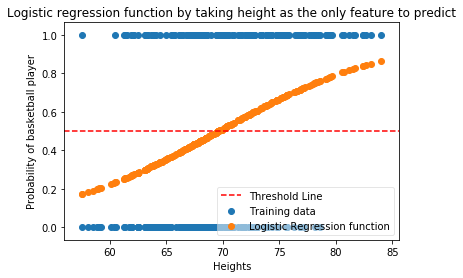

In [162]:
plt.scatter(heights_train, people_traintarget, label="Training data")
plt.title("Logistic regression function by taking height as the only feature to predict")
plt.xlabel("Heights")
plt.ylabel("Probability of basketball player")
plt.scatter(heights_train, predictions_for_heights, label = "Logistic Regression function")
plt.axhline(y=0.5, color='red', linestyle='--', label = "Threshold Line")
plt.legend(loc=4, prop={'size':10}, framealpha=0.5)
plt.show()

## Regard <font color = "red">"height" and "gender"</font>as features to predict
### Training the model with features <font color = "red">"height" and "gender"</font>

In [144]:
weights_for_heights_female = np.array([-0.2,0.5,-9.])
heights_female_train = np.concatenate((heights_train,female_train), axis = 1)
weights_for_heights_female, predictions_for_heights_female= trainModel(weights_for_heights_female, heights_female_train, people_traintarget)

iter: 0 loss: 11.385187500275512 weights: [-0.16465219  0.50025625 -8.99950625] accuracy: 0.50625
iter: 1000 loss: 0.6056088389298037 weights: [ 0.12552217  0.515947   -9.00026012] accuracy: 0.675
iter: 2000 loss: 0.6054184464982351 weights: [ 0.12550062  0.52883842 -9.005173  ] accuracy: 0.675
iter: 3000 loss: 0.6052465456894766 weights: [ 0.12548538  0.54096725 -9.01014627] accuracy: 0.671875
iter: 4000 loss: 0.6050909408482139 weights: [ 0.12547605  0.55238013 -9.0151761 ] accuracy: 0.671875
iter: 5000 loss: 0.6049496962927152 weights: [ 0.12547227  0.56312093 -9.02025882] accuracy: 0.671875
iter: 6000 loss: 0.6048211058417214 weights: [ 0.1254737   0.57323086 -9.02539102] accuracy: 0.68125
iter: 7000 loss: 0.6047036658488129 weights: [ 0.12548002  0.58274865 -9.03056946] accuracy: 0.68125
iter: 8000 loss: 0.6045960513540788 weights: [ 0.12549091  0.59171066 -9.0357911 ] accuracy: 0.684375
iter: 9000 loss: 0.6044970950034276 weights: [ 0.12550611  0.60015107 -9.04105305] accuracy: 0

### Test the model with features <font color = "red">"height" and "gender"</font>

In [145]:
heights_female_test = np.concatenate((heights_test,female_test), axis = 1)
testModel(weights_for_heights_female, heights_female_test, people_testtarget)


Loss: 0.6464549787615302 accuracy: 0.5875


### Plot the training data as well as the learned logistic regression function for both <font color = "red">"Male heights" </font>  and <font color="red">"Female heights"</font>

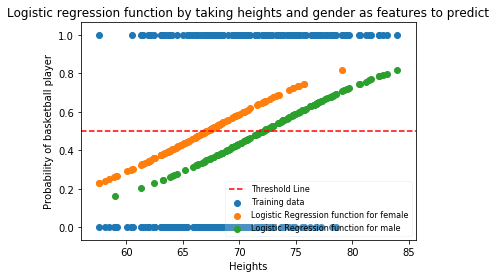

In [161]:
heights_train_for_female= heights_female_train[heights_female_train[:,1] != 0.0]
heights_train_for_male = heights_female_train[heights_female_train[:,1] == 0.0]
predictions_for_heights_female = get_prediction(weights_for_heights_female, heights_train_for_female)
predictions_for_heights_male = get_prediction(weights_for_heights_female, heights_train_for_male)
plt.title("Logistic regression function by taking heights and gender as features to predict")
plt.scatter(heights_train, people_traintarget, label="Training data")
plt.xlabel("Heights")
plt.ylabel("Probability of basketball player")
plt.scatter(heights_train_for_female[:,0], predictions_for_heights_female, label = "Logistic Regression function for female")
plt.scatter(heights_train_for_male[:,0], predictions_for_heights_male, label = "Logistic Regression function for male")
plt.axhline(y=0.5, color='red', linestyle='--', label = "Threshold Line")
plt.legend(loc=4,prop={'size': 8}, framealpha=0.2)
plt.show()

## <font color = "red">Answer to questions:</font> "do the learned functions make sense relative to one another?"
    By seeing these two functions in the plot, it can be concluded that most male are taller than female. And for both male and female with same heights, it is more likely for female with that height to be a basketball player. By comparing these two functions to the one before ("height" is the only feature), it is more accurate by predicting with features "height" and "gender".

## Regard <font color = "red">"height" and "weight"</font>as features to predict
### Training the model with features <font color = "red">"height" and "weight"</font>

In [156]:
weights_for_heights_weight= np.array([-0.1,0.0,7.2])
heights_weight_train = np.concatenate((heights_train,weight_train), axis = 1)
weights_for_heights_weight, predictions_for_heights_weight = trainModel(weights_for_heights_weight, heights_weight_train, people_traintarget)

iter: 0 loss: 0.8360657463947596 weights: [-1.02759023e-01  5.01877880e-03  7.19993641e+00] accuracy: 0.3375
iter: 1000 loss: 1.5692884907397184 weights: [-0.58301045  0.22538345  7.19082307] accuracy: 0.590625
iter: 2000 loss: 1.569258859947925 weights: [-0.58304494  0.22538966  7.191245  ] accuracy: 0.590625
iter: 3000 loss: 1.5692568664545252 weights: [-0.58305301  0.22539044  7.1916674 ] accuracy: 0.590625
iter: 4000 loss: 1.569254873625414 weights: [-0.58306107  0.22539121  7.19208976] accuracy: 0.590625
iter: 5000 loss: 1.569252881001241 weights: [-0.58306913  0.22539198  7.19251207] accuracy: 0.590625
iter: 6000 loss: 1.5692508885819751 weights: [-0.58307719  0.22539276  7.19293434] accuracy: 0.590625
iter: 7000 loss: 1.5692488963675992 weights: [-0.58308524  0.22539353  7.19335657] accuracy: 0.590625
iter: 8000 loss: 1.5692469043580872 weights: [-0.5830933   0.22539431  7.19377876] accuracy: 0.590625
iter: 9000 loss: 1.5692449125534238 weights: [-0.58310136  0.22539508  7.19420

### Test the model with features <font color = "red">"height" and "weight"</font>

In [157]:
heights_weight_test = np.concatenate((heights_test,weight_test), axis = 1)
testModel(weights_for_heights_weight, heights_weight_test, people_testtarget)

Loss: 1.5109040476790958 accuracy: 0.625


## Regard <font color = "red">"height" and "weight" and "gender"</font>as features to predict
### Training the model with features <font color = "red">"height" and "weight" and "gender"</font>

In [158]:
weights_for_all = np.array([-0.4,0.1,0.5,0])
total_train = np.concatenate((heights_train,weight_train,female_train), axis = 1)
weights_for_all, predictions_for_all = trainModel(weights_for_all, total_train, people_traintarget)

iter: 0 loss: 4.0940069714338065 weights: [-3.64719175e-01  1.98953498e-01  5.00256115e-01  4.92880960e-04] accuracy: 0.50625
iter: 1000 loss: 1.567301010920291 weights: [-4.58236764e-01  2.15420143e-01  5.40249638e-01 -4.41296917e-04] accuracy: 0.6
iter: 2000 loss: 1.5646296761701022 weights: [-4.59239057e-01  2.15676113e-01  5.82166815e-01  4.12491781e-04] accuracy: 0.603125
iter: 3000 loss: 1.562006077740168 weights: [-0.46022542  0.21592696  0.62366209  0.00124521] accuracy: 0.603125
iter: 4000 loss: 1.5594281465301656 weights: [-0.46119726  0.21617304  0.66473875  0.002057  ] accuracy: 0.609375
iter: 5000 loss: 1.5568953060046062 weights: [-0.4621549   0.21641447  0.70540009  0.00284802] accuracy: 0.6125
iter: 6000 loss: 1.5544069854558233 weights: [-0.46309867  0.21665138  0.74564945  0.00361842] accuracy: 0.6125
iter: 7000 loss: 1.5519626194551397 weights: [-0.46402885  0.21688388  0.78549017  0.00436838] accuracy: 0.6125
iter: 8000 loss: 1.5495616473724965 weights: [-0.46494576

### Test the model with features <font color = "red">"height" and "weight" and "gender"</font>

In [159]:
total_test = np.concatenate((heights_test,weight_test,female_test), axis = 1)
testModel(weights_for_all, total_test, people_testtarget)

Loss: 1.512978630162775 accuracy: 0.6125


## <font color = "red">Answer to questions:</font>  : "Evaluate on average loss and accuracy.  Does weight help as a feature?"
### Conclusion of data: 
    "Height" as the only feature:
        In training data:   Average loss is: 0.6214157536902742 Average accuracy is: 0.6624473958333331
        In test data:       Loss: 0.6509285523551498 accuracy: 0.5375
        
    "Height" and "gender" as features:
        In training data:   Average loss is: 0.6092369607734048 Average accuracy is: 0.6788401041666667
        In test data:       Loss: 0.6464549787615302 accuracy: 0.5875
        
    "Height and weight" as features:       
        In training data:   Average loss is: 2.037304208090505 Average accuracy is: 0.621521875
        In test data:       Loss: 1.5109040476790958 accuracy: 0.625
        
    "Height, weight and gender" as features:   
        In training data:   Average loss is: 1.989936305755049 Average accuracy is: 0.6311523437500002
        In test data:       Loss: 1.512978630162775 accuracy: 0.6125
        
     So, by comparing accuracy and loss, "weight" does help as a feature. After adding it, accuracy increased by comparing accuracy for feature("height", "gender", "weight") and feature("height", "gender"), and by comparing feature("height") and feature("heights", "weight")